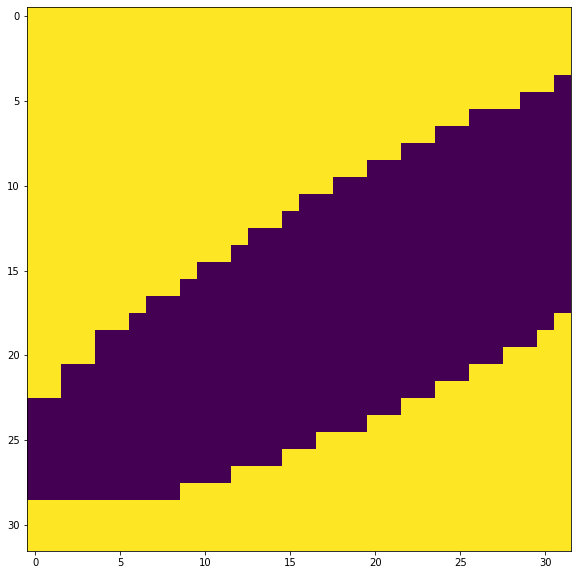

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import time
from PIL import Image, ImageOps
from scipy.linalg import hadamard
from os.path import join



br = "5.png"
path = "rollingball"

objs_br = []
#for i in br:
raw_img = cv2.imread(join(path,br))
gray_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)
#gray_img = cv2.resize(gray_img, (sz,sz)) 

# Convert to number array
objs_br = np.array(gray_img)
#objs_br.append(obj)
    
imsize = 32**2


# Now want to split each obj into sections --- 439 entries per image, then one with 438
# first turn each obj into a long array of 1d
#vecs_br = []
#for i in objs_br:
#    obj_Vector = np.reshape(i, (1,imsize))       # now each obj is a 1d array with 4096 entries
#    vecs_br.append(obj_Vector)

# now i want to split up each array into parts of 438    
#sec1_br = vecs_br[0][0][0:438]
#sec2_br = vecs_br[1][0][438:438*2]
#sec3_br = vecs_br[2][0][438*2:438*3]
#sec4_br = vecs_br[3][0][438*3:438*4]
#sec5_br = vecs_br[4][0][438*4:438*5]
#sec6_br = vecs_br[5][0][438*5:438*6]
#sec7_br = vecs_br[6][0][438*6:imsize]

#jointimg = np.concatenate((sec1_br,sec2_br,sec3_br,sec4_br,sec5_br,sec6_br,sec7_br))

# Make measurements
#obj_br = np.reshape(jointimg, (32,96)) #Reshape to a vector to make maths easier
I_br = np.identity(imsize)
#H = hadamard(imsize)
m_br = np.zeros((imsize,1))

PatternSet_br  =  I_br; # Chose H or I here.

length = 50
# Measure for each pattern
for i in range(0,imsize):
    a = round(i*(length/imsize))
    obj = objs_br[:,a:a+32]
    
    samplingVector = PatternSet_br[i,:]                       # row index of pattern matrix and all columns - choosing each row from iden matrix
    samplingPattern = np.reshape(samplingVector,(32,32))   # reshaping to image size, for each i the 1 moves along the rows of the matrices - reshapes each row of iden matrix to sz x sz
    #plt.imshow(obj)                           # shows the rasterscan in action, each coord being moved thru
    #plt.show()
    #time.sleep(0.005)
    m_br[i] = np.sum(samplingPattern * obj)                   # taking measurements, sum of patterns*image, there's a pattern for each zero in the zero array m - puts obj as a column vector basically
    #print(m)

# Reconstruct Image
recon_br = np.matmul(PatternSet_br,m_br)                    
recon_br = np.reshape(recon_br, (32,32))
plt.rcParams['figure.figsize'] = [18,10] # set the image size
fig = plt.imshow(recon_br) 

In [ ]:
plt.imshow(objs_br)